# Data Preparation and Pre-prediction Analysis

## Libraries

In [87]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Helper Functions
---

In [157]:
def plot_boxplots(dataset, quant_attributes):
    ncols = 3
    nrows = math.ceil(len(quant_attributes)/3)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9,15))
    for index, attribute in enumerate(quant_attributes):
        col = index//ncols
        row = index%ncols
        age_list = bank_marketing[attribute].values
        subplot_title = '{attribute} Box Plot'.format(attribute=attribute.capitalize())
        ax[col, row].boxplot(age_list)
        ax[col, row].set_title(subplot_title)
    fig.suptitle("Quantitative Attributes")
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [158]:
def plot_histograms(dataset, quant_attributes):
    ncols = 3
    nrows = math.ceil(len(quant_attributes)/3)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,15))
    for index, attribute in enumerate(quant_attributes):
        col = index//ncols
        row = index%ncols
        age_list = bank_marketing[attribute].values
        subplot_title = '{attribute} Box Plot'.format(attribute=attribute.capitalize())
        ax[col, row].hist(age_list, bins=50)
        ax[col, row].set_title(subplot_title)
    fig.suptitle("Quantitative Attributes")
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

## Data Exploration
---

In [82]:
# Loading the data into the Pandas dataframe
# From here we can see this dataset has 4521 records
bank_marketing = pd.read_csv("bank_marketing.csv")
len(bank_marketing)

4521

In [20]:
# Exploring the bank marketing dataset.
bank_marketing.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
# Before our analysis, we check how many values are missing from each column
bank_marketing.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Pre-prediction Analysis
---

- **Find max, min, mean and standard deviation of attributes.**

In [130]:
quant_attributes_stat = bank_marketing.describe()
quant_attributes_stat

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


- **Box Plots for Each Quantitative Attributes**

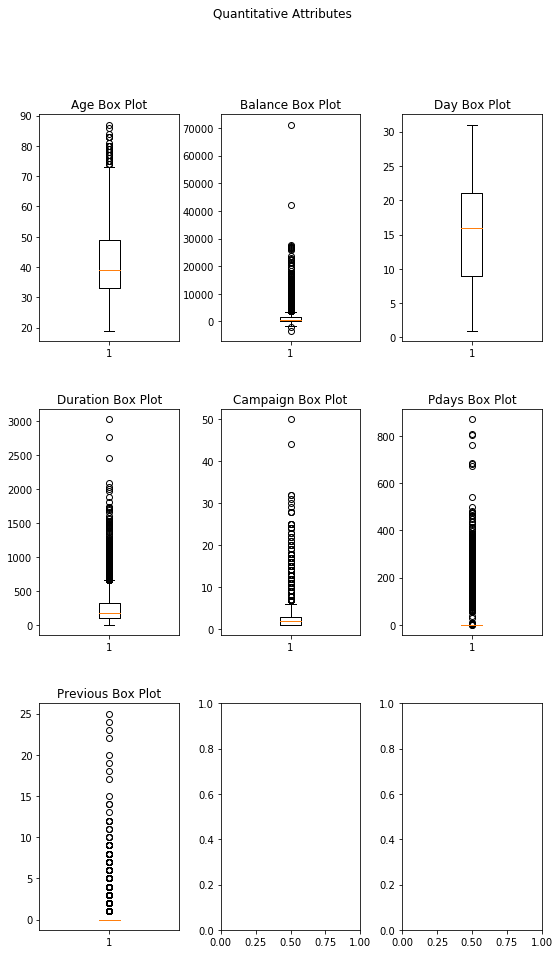

In [160]:
plot_boxplots(bank_marketing, list(quant_attributes_stat))

- **Plot Age Distribution**

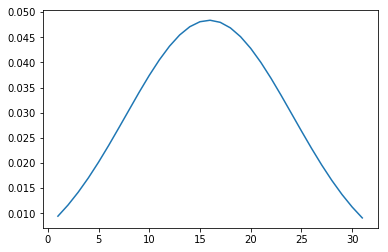

In [135]:
# age_list = bank_marketing['age'].values
# age_list.sort()
# age_mean = np.mean(age_list)
# age_std = np.std(age_list)
# age_pdf = stats.norm.pdf(age_list, age_mean, age_std)
# plt.plot(age_list, age_pdf)
# plt.show()

- **Plot Histograms for Attributes of Concern**

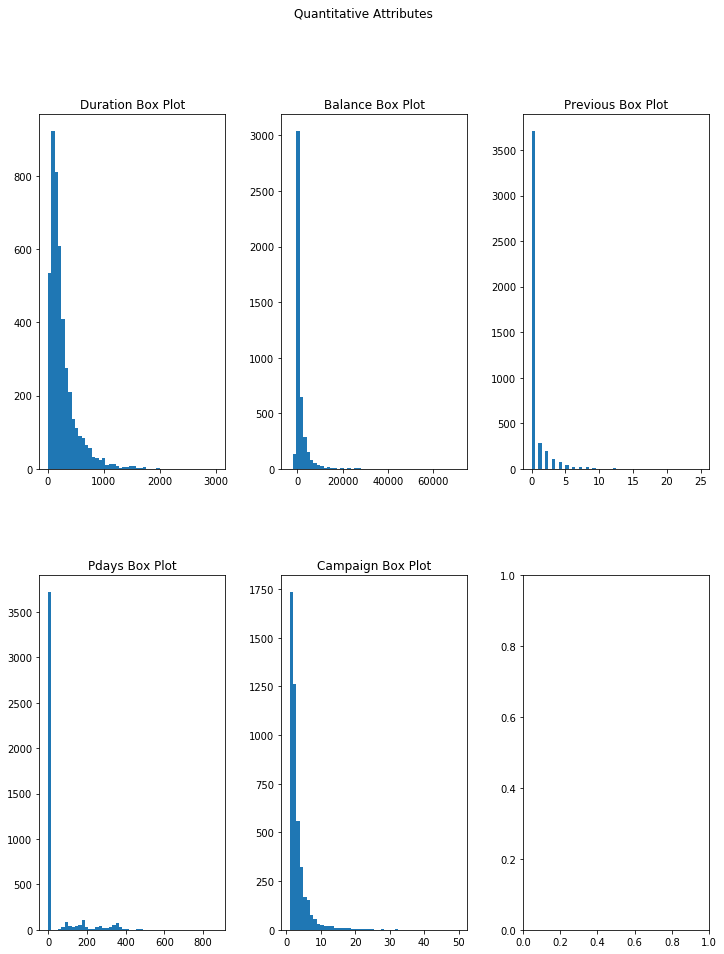

In [159]:
attributes_concern = ['duration', 'balance', 'previous', 'pdays', 'campaign']
plot_histograms(bank_marketing, attributes_concern)